# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

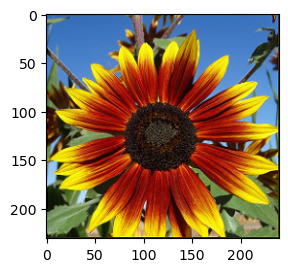

In [5]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

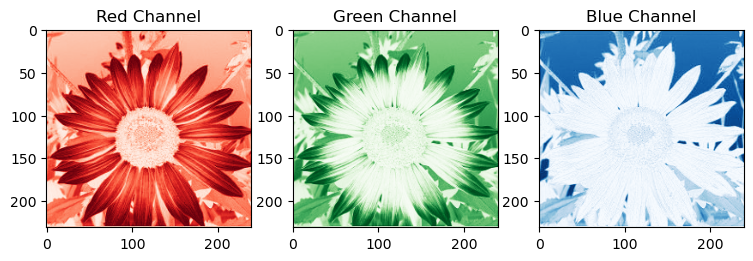

In [6]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

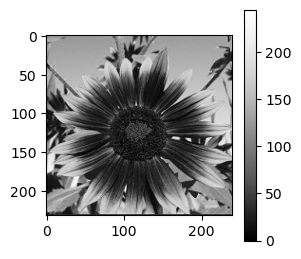

In [8]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:** можно, но из-за особенностей восприятия разных цветов потеряются детали в изображении, нужно взять средневзвешенное.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:** Greys_r это 255 - Greys, мы использовали его, потому что для Greys matplotlib обозначает более низкие значения светлыми тонами, а высокие – темными, то есть "переворачивает" яркость картинки – мы переворачиваем обратно.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [9]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

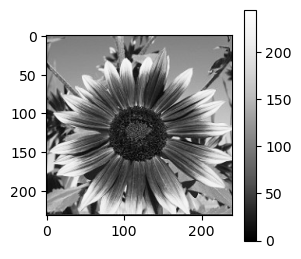

In [10]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [11]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [12]:
def convert_rgb_to_grayscale(img_rgb):
    return img_rgb[:, :, 0] * 0.2989 + img_rgb[:, :, 1] * 0.587 + img_rgb[:, :, 2] * 0.114

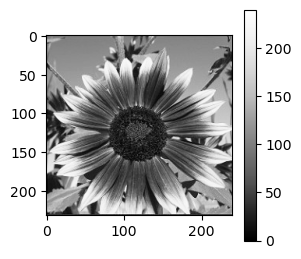

In [13]:
plt.figure(figsize=[3, 3])
plt.imshow(convert_rgb_to_grayscale(img_rgb), cmap='Greys_r')
plt.colorbar()
plt.show()

In [14]:
np.allclose(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), convert_rgb_to_grayscale(img_rgb), atol=1)

# assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

True

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [15]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

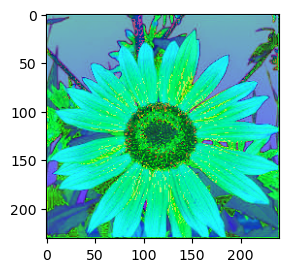

In [16]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

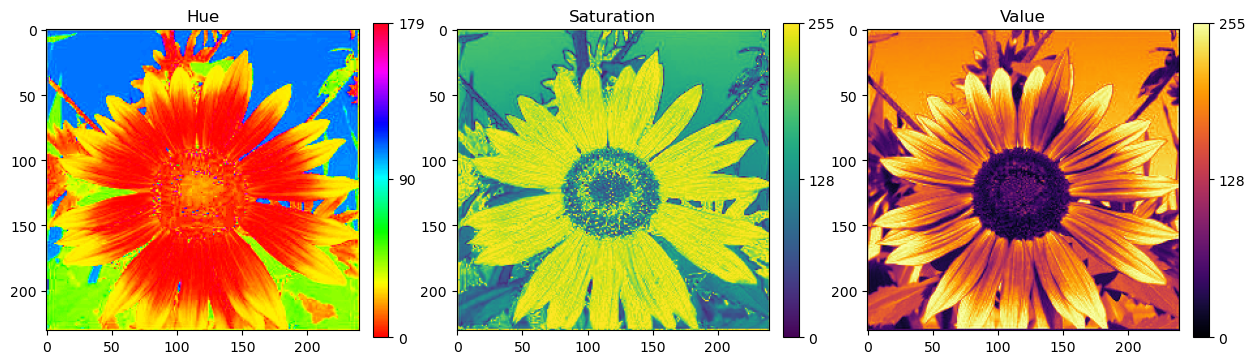

In [17]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

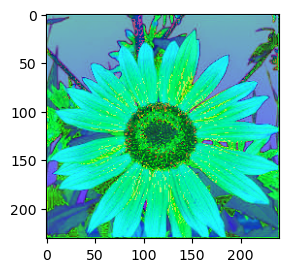

In [18]:
img_ycc = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

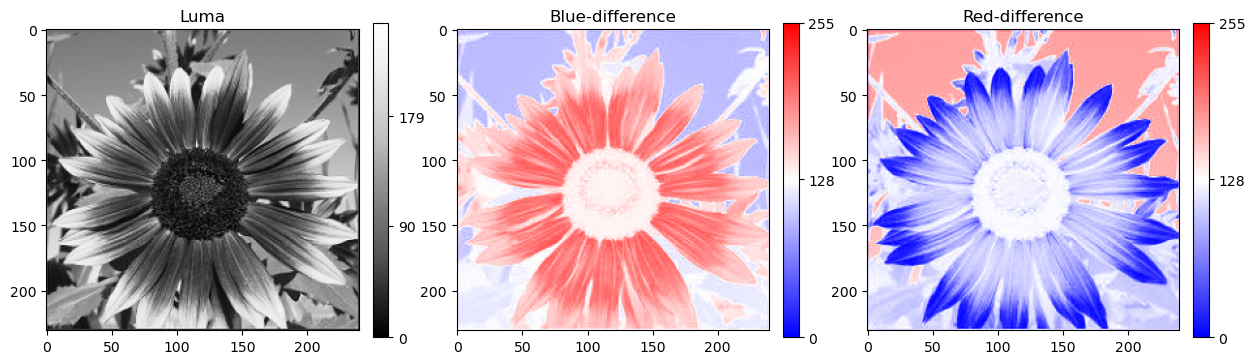

In [19]:
y, cb, cr = cv2.split(img_ycc)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(y, cmap="Greys_r", vmin=0, vmax=255)
axs[0].set_title('Luma')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(cb, cmap="bwr", vmin=0, vmax=255)  # Using 'viridis' for blues
axs[1].set_title('Blue-difference')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(cr, cmap="bwr", vmin=0, vmax=255)  # Using 'inferno' for reds
axs[2].set_title('Red-difference')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**

В случае печати удобнее пользоваться CMYK, так как яркость изображения достигается засчет вычитания величин из максимума, а не сложения. Также в формулу добавлен черный цвет (K), который используется для затемнения изображения, так как сочетание голубого, пурпурного и желтого дает коричневый цвет, а не черный.

Другая часто используемая цветовая схема – YPbPr, которой пользовались в кинескопах, так как компонента Y (яркость) была совместима с черно-белыми телевизорами, Также это позволяло сэкономить на клоичестве передаваемых данных, так как данные по blue-difference и red-difference можно было сжать без потерь для восприятия.

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [20]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [21]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [22]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

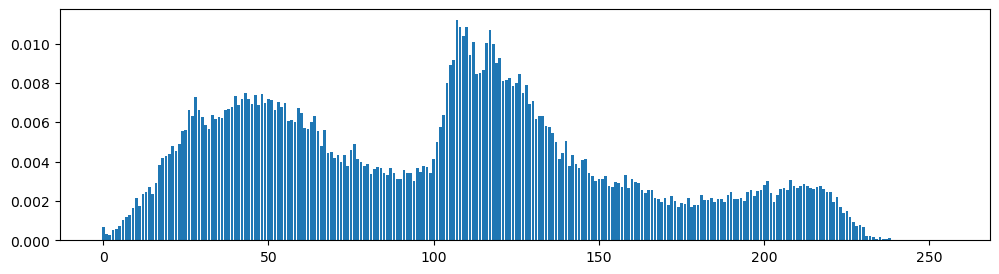

In [23]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [24]:
def compute_hist(img: np.ndarray):
    u, c = np.unique(img, return_counts=True)
    all_bins = np.zeros((256,))
    for i, v in enumerate(u):
        all_bins[v] = c[i]
    return all_bins

In [25]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

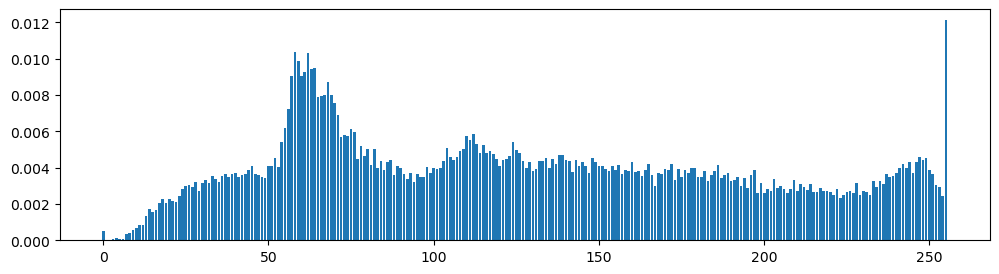

In [26]:
visualize_hist(hist_r)

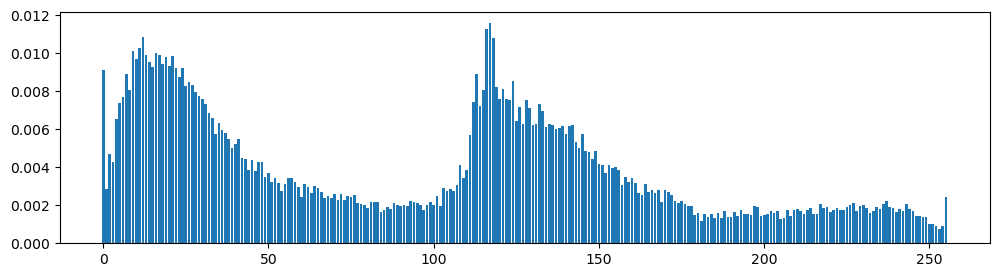

In [27]:
visualize_hist(hist_g)

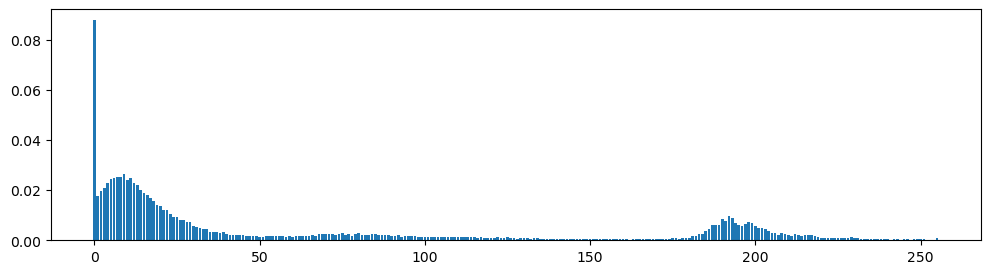

In [28]:
visualize_hist(hist_b)

In [29]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

Можно сделать вывод о яркости и цветовом балансе изображений, а также о контрасте на изображении.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:** Смена камеры – сложно предсказать, как именно смена кадра повлияет на цветовой баланс на картинке (условно, сначала камера направлена на освещение, а потом – в обратную сторону). То же самое для смены сцены. Хотя можно сказать, что в случае, когда освещение не меняется, общая гистограмма (в grayscale) изменится относительно слабо. При смене освещения – опять же, в зависимости от того, какого цвета освещение, если просто поднимается яркость, то все гистограммы сместятся вправо, если освещение снизится, то наоборот, влево.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

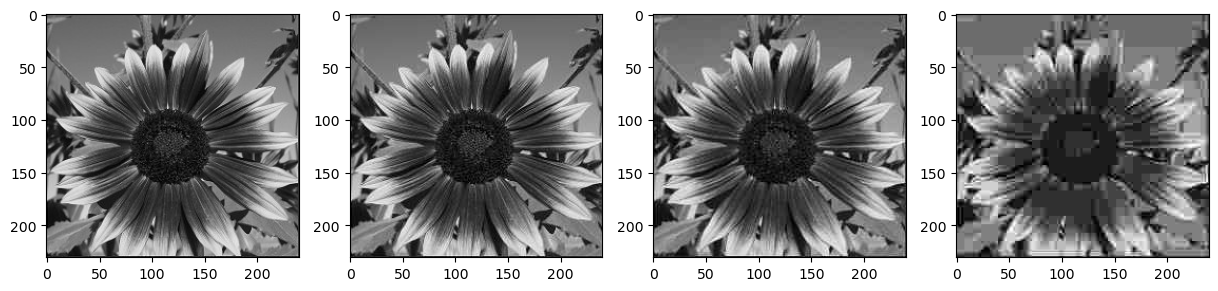

In [30]:
nc = [90, 60, 30, 5]
fig, ax = plt.subplots(1, 4, figsize=[15, 5])

for i, n in enumerate(nc):
    _, encoded_img = cv2.imencode(".jpg", img_gray, [cv2.IMWRITE_JPEG_QUALITY, n])
    compressed_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    ax[i].imshow(compressed_img, cmap='Greys_r')

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

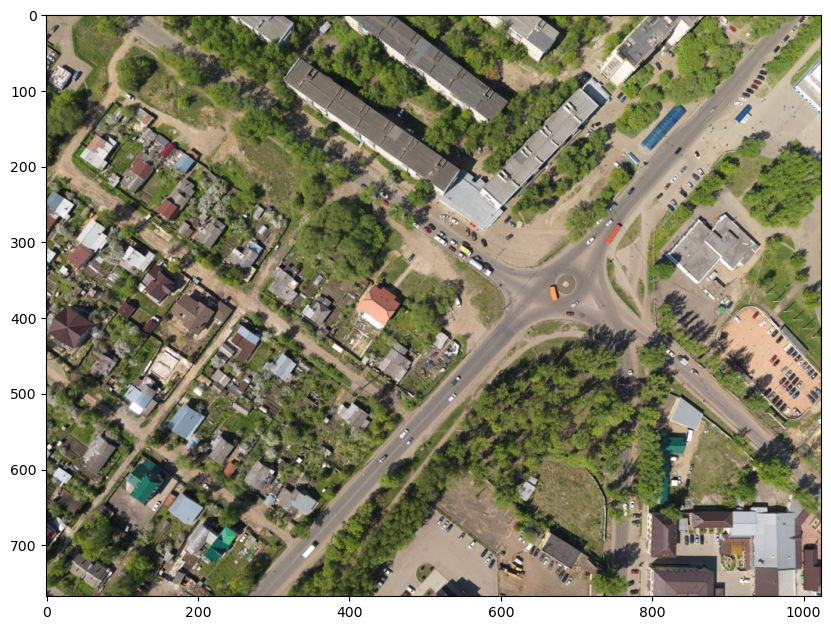

In [31]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

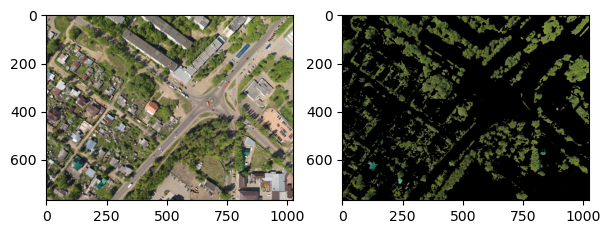

In [32]:
img_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(img_hsv, lower_green, upper_green)
masked_img = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
result = cv2.cvtColor(masked_img, cv2.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(7, 15))
ax[0].imshow(aerial_image)
ax[1].imshow(result)

In [38]:
mask.shape[0] * mask.shape[1]

786432

In [40]:
mask.sum().astype(np.float64) / (mask.shape[0] * mask.shape[1] * 255)

np.float64(0.2537689208984375)

Погрешность, по ощущениям, меньше процента, потому что в маску попало несколько зеленых крыш, а в остальном (на вид) сегментация захватила все деревья.

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [41]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img.copy().astype(np.int64)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if i > 0:
                    self.img[i][j] += self.img[i - 1][j]
                if j > 0:
                    self.img[i][j] += self.img[i][j - 1]
                if i > 0 and j > 0:
                    self.img[i][j] -= self.img[i - 1][j - 1]

    def sum(self, x, y, w, h):
        w += x - 1
        h += y - 1
        ans = self.img[w][h]
        if x > 0:
            ans -= self.img[x - 1][h]
        if y > 0:
            ans -= self.img[w][y - 1]
        if x > 0 and y > 0:
            ans += self.img[x - 1][y - 1]
        return ans


In [42]:
I = IntegralImage(img_gray)

In [43]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** при сглаживании и избавлении от шума

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическому программированию (?)